# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [55]:
%matplotlib inline

# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np
import geopandas as gpd

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [4]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [5]:
#Visual Check
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [6]:
#Check Number of Values and Data Types
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            305 non-null    datetime64[ns]
 1   City of London        306 non-null    object        
 2   Barking & Dagenham    306 non-null    object        
 3   Barnet                306 non-null    object        
 4   Bexley                306 non-null    object        
 5   Brent                 306 non-null    object        
 6   Bromley               306 non-null    object        
 7   Camden                306 non-null    object        
 8   Croydon               306 non-null    object        
 9   Ealing                306 non-null    object        
 10  Enfield               306 non-null    object        
 11  Greenwich             306 non-null    object        
 12  Hackney               306 non-null    object        
 13  Hammersmith & Fulham

In [7]:
#Check for Null Values
properties.isna().sum()

Unnamed: 0                1
City of London            0
Barking & Dagenham        0
Barnet                    0
Bexley                    0
Brent                     0
Bromley                   0
Camden                    0
Croydon                   0
Ealing                    0
Enfield                   0
Greenwich                 0
Hackney                   0
Hammersmith & Fulham      0
Haringey                  0
Harrow                    0
Havering                  0
Hillingdon                0
Hounslow                  0
Islington                 0
Kensington & Chelsea      0
Kingston upon Thames      0
Lambeth                   0
Lewisham                  0
Merton                    0
Newham                    0
Redbridge                 0
Richmond upon Thames      0
Southwark                 0
Sutton                    0
Tower Hamlets             0
Waltham Forest            0
Wandsworth                0
Westminster               0
Unnamed: 34             306
Inner London        

In [8]:
#Visual Check
properties.describe()

,Unnamed: 34,Unnamed: 37,Unnamed: 47
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [9]:
#Transpose dataframe as properties_t
properties_t = properties.transpose()

#Visual Check
properties_t.head()

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,305
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408


In [10]:
#View index
properties_t.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [11]:
#Reset index
properties_t = properties_t.reset_index()

#Visual Check
properties_t.head()

,index,0,1,2,3,4,5,6,7,8,...,296,297,298,299,300,301,302,303,304,305
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408


In [12]:
#Check index
properties_t.index

RangeIndex(start=0, stop=49, step=1)

In [13]:
#Rename columns with first row values
properties_t.columns = properties_t.iloc[0]

#Visual Check
properties_t.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408


In [14]:
#Drop row 0
properties_t = properties_t.drop(0)

In [15]:
#Visual Check
properties_t.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,488784,501533,494770,432188,427126,423161,467145,461398,494455,466574


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [16]:
#Rename columns
properties_t = properties_t.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

In [17]:
properties_t.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,488784,501533,494770,432188,427126,423161,467145,461398,494455,466574


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [18]:
#Melt
properties_t = pd.melt(properties_t, id_vars= ['London_Borough', 'ID'])

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [19]:
#Visual Check
properties_t.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [20]:
#Rename columns
properties_t = properties_t.rename(columns = {0:'Date', 'value': 'Price'})

In [21]:
#Visual Check
properties_t.head()

,London_Borough,ID,Date,Price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [22]:
#Check data types
properties_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London_Borough  14640 non-null  object        
 1   ID              13725 non-null  object        
 2   Date            14640 non-null  datetime64[ns]
 3   Price           13725 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 457.6+ KB


In [23]:
#Convert price to float
properties_t['Price'] = pd.to_numeric(properties_t['Price'])

In [24]:
#Check data types
properties_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London_Borough  14640 non-null  object        
 1   ID              13725 non-null  object        
 2   Date            14640 non-null  datetime64[ns]
 3   Price           13725 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 457.6+ KB


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [25]:
#Check number of unqiue boroughs
properties_t['London_Borough'].nunique()

48

In [26]:
#Review all boroughs
properties_t['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [27]:
#Check for null values
properties_t[properties_t['ID'].isna()]

,London_Borough,ID,Date,Price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
14580,Unnamed: 37,NaN,2020-04-01,NaN
14590,Unnamed: 47,NaN,2020-04-01,NaN
14625,Unnamed: 34,NaN,2020-05-01,NaN
14628,Unnamed: 37,NaN,2020-05-01,NaN


In [28]:
#Drop null values
properties_dn = properties_t.dropna()

In [29]:
#Check for null values
properties_dn[properties_dn['ID'].isna()]

,London_Borough,ID,Date,Price


In [30]:
# A list of non-boroughs. 
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [31]:
#Filter Non-Boroughs
properties_dn = properties_dn[~properties_dn.London_Borough.isin(nonBoroughs)]

In [32]:
#Check number of unique boroughs
properties_dn['London_Borough'].nunique()

33

In [33]:
#View list of unique boroughs
properties_dn['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

In [34]:
#Rename cleaned dataframe to dn 
df = properties_dn

#Visual Check
df.head()

,London_Borough,ID,Date,Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [35]:
#Check data types
df.dtypes

London_Borough            object
ID                        object
Date              datetime64[ns]
Price                    float64
dtype: object

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

Text(0.5, 1.0, 'Average Price of Housing in Barnet')

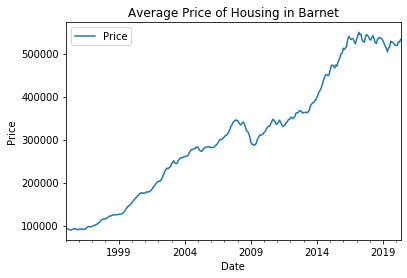

In [36]:
#Create Line Plot of Housing Prices in Barnet
barnet_prices = df[df['London_Borough'] == 'Barnet']

ax = barnet_prices.plot(kind ='line',x = 'Date', y='Price')

ax.set_ylabel('Price')
ax.set_title('Average Price of Housing in Barnet')

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [37]:
#Add Year column based on Date
df['Year'] = df['Date'].apply(lambda t: t.year)

# Visual Check
df.tail()

,London_Borough,ID,Date,Price,Year
14620,Sutton,E09000029,2020-05-01,376154.7358,2020
14621,Tower Hamlets,E09000030,2020-05-01,498227.8399,2020
14622,Waltham Forest,E09000031,2020-05-01,443509.7964,2020
14623,Wandsworth,E09000032,2020-05-01,615207.1739,2020
14624,Westminster,E09000033,2020-05-01,937356.0042,2020


In [38]:
#Group by borough and yearly mean
df_group = df.groupby(by=['London_Borough', 'Year']).mean()

#View Sample
df_group.sample(10)

Price
London_Borough       Year               
Newham               2004  185680.343950
Merton               2017  512185.807217
Barnet               2001  185563.352600
                     2014  430363.351225
Wandsworth           2004  271649.723533
Hounslow             1997   84535.691348
Barnet               2004  271854.112992
Kensington & Chelsea 1998  268350.122142
Enfield              2017  395929.176617
Croydon              1995   68923.340845

In [39]:
#Visual Check
df_group.head()

Price
London_Borough     Year              
Barking & Dagenham 1995  51817.969390
                   1996  51718.192690
                   1997  55974.262309
                   1998  60285.821083
                   1999  65320.934441

In [40]:
#Reset Index
df_group = df_group.reset_index()

#Visual Check
df_group.head()

,London_Borough,Year,Price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [41]:
# Define create_price_ration function
def create_price_ratio(d):
    y1998 = float(d['Price'][d['Year']==1998])
    y2018 = float(d['Price'][d['Year']==2018])
    ratio = [y1998/y2018]
    return ratio

In [42]:
#Test function
create_price_ratio(df_group[df_group['London_Borough']=='Barking & Dagenham'])

[0.20422256235393685]

In [43]:
#Create dictionary to hold boroughs and price ratios
final = {}

for b in df_group['London_Borough'].unique():
    #Set borough to value in 'London_Borough' columns
    borough = df_group[df_group['London_Borough'] == b]
    # Call create_price_ratio function using borough variable
    final[b] = create_price_ratio(borough)

# print final dictionary
print(final) 

{'Barking & Dagenham': [0.20422256235393685], 'Barnet': [0.22945274120785797], 'Bexley': [0.2353507654063011], 'Brent': [0.2043086864360114], 'Bromley': [0.24421308489837312], 'Camden': [0.20261973503252542], 'City of London': [0.18862157770244367], 'Croydon': [0.23803288028014047], 'Ealing': [0.23194048191708755], 'Enfield': [0.23455064269011863], 'Greenwich': [0.20995010893854218], 'Hackney': [0.16133493530705734], 'Hammersmith & Fulham': [0.24167443054605853], 'Haringey': [0.19475619095546956], 'Harrow': [0.24635417785626296], 'Havering': [0.23120155787014757], 'Hillingdon': [0.23807975835429931], 'Hounslow': [0.25148317824115635], 'Islington': [0.20643891170300285], 'Kensington & Chelsea': [0.19675491852791563], 'Kingston upon Thames': [0.23416190234282552], 'Lambeth': [0.20170435486140822], 'Lewisham': [0.1835124676472171], 'Merton': [0.21091380604361798], 'Newham': [0.18848754146121072], 'Redbridge': [0.2236545053715767], 'Richmond upon Thames': [0.24967779731157863], 'Southwark'

In [44]:
# Create dataframe of final
df_ratios = pd.DataFrame(final)

# Visual Check
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0.204223,0.229453,0.235351,0.204309,0.244213,0.20262,0.188622,0.238033,0.23194,0.234551,...,0.210914,0.188488,0.223655,0.249678,0.181275,0.242806,0.216137,0.171387,0.210185,0.186791


In [45]:
#Transpose 
df_ratios_T = df_ratios.T

#Reset index
df_ratios = df_ratios_T.reset_index()

#Visual Check
df_ratios.head()

,index,0
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


In [46]:
#Rename columns
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)

#Visual check
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


In [47]:
#Generate descriptive statistics
df_ratios['2018'].describe()

count    33.000000
mean      0.214910
std       0.024662
min       0.161335
25%       0.196755
50%       0.210914
75%       0.235351
max       0.251483
Name: 2018, dtype: float64

In [48]:
#Sort by descending value
top15 = df_ratios.sort_values(by='2018',ascending=False).head(15)
print(top15)

                 Borough      2018
17              Hounslow  0.251483
26  Richmond upon Thames  0.249678
14                Harrow  0.246354
4                Bromley  0.244213
28                Sutton  0.242806
12  Hammersmith & Fulham  0.241674
16            Hillingdon  0.238080
7                Croydon  0.238033
2                 Bexley  0.235351
9                Enfield  0.234551
20  Kingston upon Thames  0.234162
8                 Ealing  0.231940
15              Havering  0.231202
1                 Barnet  0.229453
25             Redbridge  0.223655


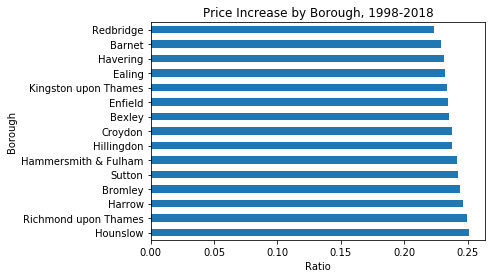

In [49]:
#Plot Bar Chart of boroughs with highest price increase

ax = top15.plot.barh(x='Borough', y='2018', legend=False)
ax.set_xlabel('Ratio')
ax.set_title('Price Increase by Borough, 1998-2018');

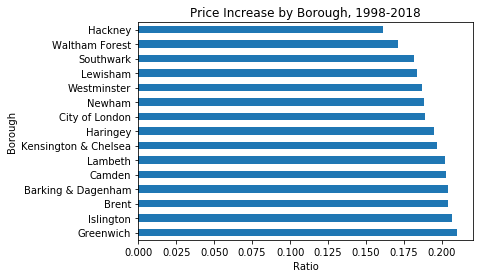

In [50]:
#Plot Bar Chart of boroughs with lowest price increase

low15 = df_ratios.sort_values(by='2018',ascending=False).tail(15)
ax = low15.plot.barh(x='Borough', y='2018', legend=False)
ax.set_xlabel('Ratio')
ax.set_title('Price Increase by Borough, 1998-2018');

### 4. Conclusion

> The borough with the greatest increase in housing prices from 1998-2018 was Hounslow (25%). The borough with the lowest increase was Redbridge (16%), and the overall mean for all boroughs was 21%.

### 5. Plot Map

In [89]:
#Import Map
fp = "geodata/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(fp)

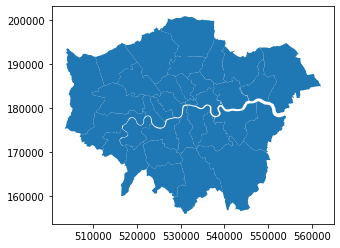

In [90]:
#Plot Map
map_df.plot()

In [108]:
map_df["center"] = map_df["geometry"].centroid
map_df_points = map_df.copy()
map_df_points.set_geometry("center", inplace = True)

In [109]:
#Merge Dataframes
merged = map_df.set_index("NAME").join(df_ratios.set_index("Borough"))
merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,center,2018
NAME,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",POINT (519297.635 166820.011),0.234162
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",POINT (533290.154 163541.244),0.238033
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",POINT (542895.512 165655.521),0.244213
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",POINT (513515.506 175643.224),0.251483
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",POINT (515887.938 181715.496),0.231940


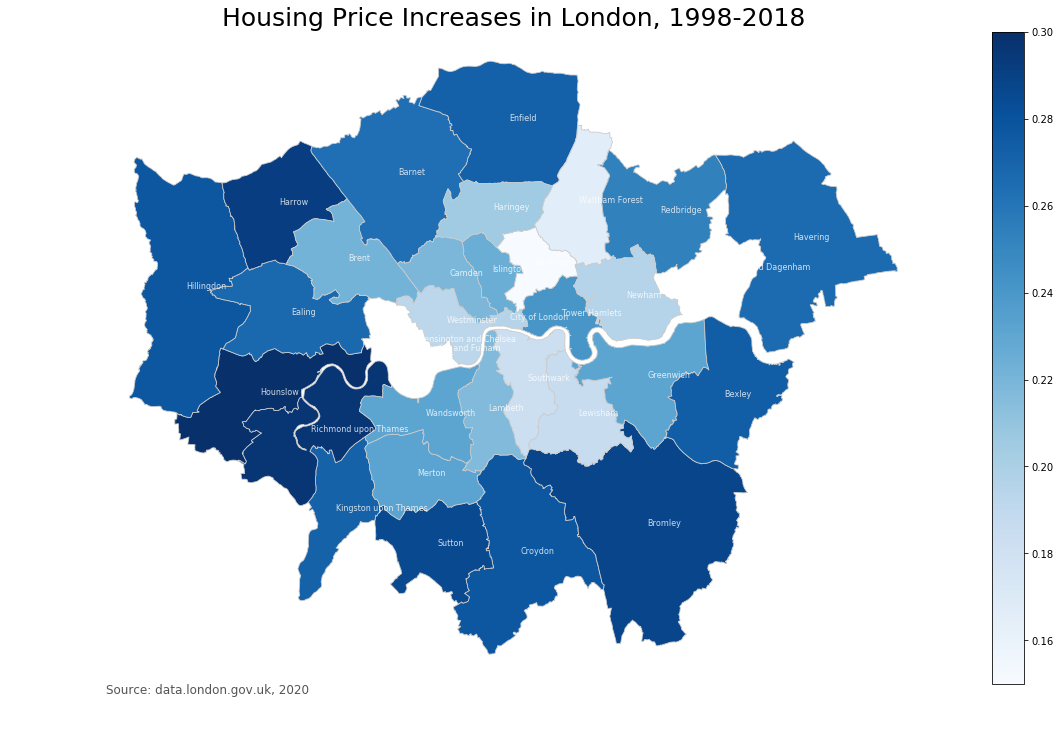

In [126]:
v = "2018"
vmin, vmax = .15, .3
fig, ax = plt.subplots(1, figsize=(20, 12))

merged.plot(column=v, cmap='Blues', linewidth=0.8, ax=ax, edgecolor="0.8")
ax.axis("off")

sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))

texts = []
for x, y, label in zip(map_df_points.geometry.x, map_df_points.geometry.y, map_df_points["NAME"]):
    texts.append(plt.text(x, y, label, fontsize = 8, color='white', alpha=0.8),)
    

ax.annotate("Source: data.london.gov.uk, 2020",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", verticalalignment='top', fontsize=12, color="#555555")
ax.set_title("Housing Price Increases in London, 1998-2018", fontdict={'fontsize': '25', 'fontweight' : '3'})

sm._A = []
cbar = fig.colorbar(sm)
fig.savefig("map_export.png", dpi=300);